# COGS 108 - COVID-19 Impact on UCSD Students

# Overview

We are interested in answering the question of how remote learning has affected UCSD students’ grades as a consequence of the pandemic. To answer this, we collected and organized data from UCSD’s CAPEs by web scraping. We then cleaned our data, standardized functions, and defined variables to generate our visualizations. From our observations, in contrast to our hypothesis, we found that UCSD students received better grades compared to previous years by a significant amount.

# Names

- Lily Yu
- Sophia Alonso
- Kelly Tran
- Yining Wang

<a id='research_question'></a>
# Research Question

How has remote learning during the COVID-19 pandemic affected UCSD students’ grades and learning experience?

(Here we measure learning experience by the rate students reccomend classes)

<a id='background'></a>

## Background & Prior Work

The COVID-19 pandemic has led to school closures worldwide and has caused a shift to remote learning for many students [2]. This shift has been noted to have a negative impact on many, due to issues with accessing the internet, the lack of socializing, and large shift in routine [1]. McKinsey & Company released an article addressing possible future impacts because of this shift, and mentions the possibility of larger achievement gaps between students, which could lead to a loss in future earnings and GDP gains [3].
McKinsey & Company also highlighted how the negative effects of remote learning might be disproportionately felt by low-income students [3], while Edward Roesch points out that only a fraction of African students have access to remote learning in the first place [1]. We address these ideas more in our ethics and privacy section. Roesch also brings up that China and India have started delivering remote learning through televisions [1]. Such different policies undoubtedly result in different learning outcomes, and fuel our interest in the impacts of remote learning on a more local scale.
The Global Partnership blog has put together a list of eight data-related tools that measure the effects of COVID-19 and remote learning on students [4]. While these trackers do not directly measure the effect on student grades or performance, they are relevant for tracking specific education plans by country, or effects on government budgets that affect education spending. Specifically, the UNESCO COVID-19 Impact on Education tracker [1] has an interactive map that shows the increase in affected learners as the pandemic progressed. This relates to our data science project because we want to figure out how much the changes due to COVID-19 is affecting students, and in what ways.


References:
- 1) https://elearningindustry.com/shift-to-remote-learning-affects-students-used-face-to-face
- 2) https://en.unesco.org/covid19/educationresponse
- 3）https://www.mckinsey.com/industries/public-and-social-sector/our-insights/covid-19-and-student-learning-in-the-united-states-the-hurt-could-last-a-lifetime\
- 4) https://www.globalpartnership.org/blog/8-tracking-tools-covid-19-data-education

# Hypothesis


We hypothesize that remote learning will generally have a negative impact on education, for reasons such as disparate internet access, easier distractions, and transitioning to a very different learning environment. We predict that for these reasons, we will see lower grades and measures that point to worse learning outcomes correlate with the adoption of remote learning.

# Dataset(s)

#### Dataset Name: UCSD CAPES Data

Link to the dataset: https://cape.ucsd.edu/

Number of observations: 49752

UCSD course evaluation data dating back to 2007, including observations of the average grade students expected/received, and the percentages of those surveyed that would recommend the class or instructor. This data wasn’t conveniently available in an easily workable format, so we used Python to scrape the data, as seen below.

### Data Scraping

In [1]:
#Tools we'll need to scrape the data
from selenium import webdriver
import time
import re
import pandas as pd

In [2]:
#Read in credentials

#These credentials are not included with this respoitory, to run this code,
#create a credentials.config file with your SSO username on the first line and password on the second.

with open("credentials.config", "r") as f:
    user = f.readline().strip("\n")
    password = f.readline().strip("\n")

In [3]:
#Read in list of departments, taken from source of https://act.ucsd.edu/scheduleOfClasses/scheduleOfClassesStudent.htm 

with open("departments.txt", "r") as f:
    departments_raw = f.read()
    
#Strip off opening HTML tag
departments_raw = departments_raw.split('\t\t\t\t\t\t\n\t\t\t\t\t')[1]

#Extract list of department codes
departments = re.split('<option value="|"', departments_raw)[1::2]

#Strip all trailing spaces
departments = [dept.strip() for dept in departments]

In [4]:
url = "https://cape.ucsd.edu/responses/Results.aspx"

#Create webdriver and load page
driver = webdriver.Firefox()
driver.get(url)

#Send login info
driver.find_element_by_id("ssousername").send_keys(user)
driver.find_element_by_id("ssopassword").send_keys(password)
driver.find_element_by_name("_eventId_proceed").click()

**At this point, you will have to approve two factor authentication before running further cells. (this cannot be handled through Python)** 

In [5]:
df = pd.DataFrame()
text_box = driver.find_element_by_id("ContentPlaceHolder1_txtCourse")
error_list = []

#Iterate through all departments
for department in departments:
    
    #Input department code in text box
    text_box.clear()
    text_box.send_keys(department)
    driver.find_element_by_id("ContentPlaceHolder1_btnSubmit").click()

    #Keep waiting until loading animation is gone
    time.sleep(1)
    loading_animation = driver.find_element_by_id("ContentPlaceHolder1_UpdateProgress1")
    while loading_animation.get_attribute("aria-hidden") == "false":
        time.sleep(1)

    temp_df = pd.DataFrame(pd.read_html(driver.page_source)[0])
    if len(temp_df) > 1:
        df = df.append(temp_df)
    else:
        #print("No classes for {}".format(department))
        error_list.append(department)

In [6]:
#Drop any exact duplicates and save our data
df = df.drop_duplicates()
df.to_csv("CAPES_data.csv", index = False)
driver.close()

# Setup

In [11]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statistics

In [12]:
capes = pd.read_csv("CAPES_data.csv")
capes.head()

,Instructor,Course,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received
0,"Andrews, Abigail Leslie",AIP 197T - AIP: Special Programs (B),FA20,34,11,100.0%,100.0%,4.06,B+ (3.67),NaN
1,"Hill, Seth J","AIP 197DC - Washington, DC Internship (A)",FA19,24,3,0.0%,0.0%,4.50,NaN,NaN
2,"Wienhausen, Gabriele",AIP 197T - AIP: Special Programs (A),FA19,11,4,100.0%,100.0%,2.00,NaN,NaN
3,"Wienhausen, Gabriele",AIP 197T - AIP: Special Programs (A),S319,31,3,66.7%,50.0%,7.83,NaN,NaN
4,"Hill, Seth J","AIP 197DC - Washington, DC Internship (A)",SP19,22,6,100.0%,100.0%,8.90,A (4.00),NaN


In [13]:
len(capes)

49752

# Data Cleaning

### Standardizing Columns

To clean our data, we standardized the `Avg Grade Expected` and `Avg Grade Received` columns. In our dataset, these columns came in the format of `LETTER (NUMBER)`, like `A (4.00)`. To make analysis easier, we discarded the letters, and kept only the numbers inside, converted to a float.

We performed a similar operation for the `Rcmnd Class` and `Rcmnd Instr` columns. These columns originally came in the format `NUMBER%`, like `93.3%`. We discarded the percent signs, and again converted the leftover string to floats, for easier analysis.

Furthermore, our dataset's `Term` column came in the format `TERMYEAR`, like `FA20`. Strings like this are difficult for us to sort chronologically, so we extracted the term and year information, and put them into two new columns, `Term_num` and `Year`. For the `Term_num` column, we mapped every term to the order it comes in a year (ex. "WI" is term 1, "SP" is term 2...), then saved this number as an int. For the `Year` column, we simply extracted the year, appended "20" to the front, so "15" becomes "2015" (there are no rows that are pre-2000 in this dataset), and saved the year as an int.

Finally, we also extracted the department code (ex. "COGS") from our dataset's `Course` column, adding it to a `Department` column. To do this, we simply took the first chunk of text before a space. We verified that this simple solution works for all our observations. 

In [14]:
def standardize_grades(text):
    #Handle if function has already been run
    if type(text) == float:
        return text
    
    #Keep all text after last parentheses open
    grade = text.split("(")[-1]
    
    #Cut off trailing parentheses close
    grade = grade.replace(")", "")
    
    #Convert to float
    grade = float(grade)
    
    return grade

In [15]:
#Convert both grade columns to floats
capes["Avg Grade Expected"] = capes["Avg Grade Expected"].apply(standardize_grades)
capes["Avg Grade Received"] = capes["Avg Grade Received"].apply(standardize_grades)

In [16]:
def standardize_recommendations(text):
    #Handle if function has already been run
    if type(text) == float:
        return text
    
    pct = text.replace("%", "")
    
    #Convert to float
    pct = float(pct)
    
    return pct

In [17]:
#Convert both recommend percent columns to floats
capes["Rcmnd Class"] = capes["Rcmnd Class"].apply(standardize_recommendations)
capes["Rcmnd Instr"] = capes["Rcmnd Instr"].apply(standardize_recommendations)

In [18]:
def extract_term(text):
    TERMS = { "WI": 1, "SP": 2, "S1": 3, "S2": 4, "S3": 5, "FA": 6, "SU" : 7}
    
    term = text[:2]
    term = TERMS[term]
    
    return term

In [19]:
def extract_year(text):
    
    year = text[2:]
    year = int("20" + year)
    
    return year

In [20]:
#Extract year and term as ints from term column
capes['Term_num'] = capes['Term'].apply(extract_term)
capes['Year'] = capes['Term'].apply(extract_year)

In [21]:
def extract_department(text):
    return text.split(" ")[0]

In [22]:
capes['Department'] = capes['Course'].apply(extract_department)

In [23]:
capes

,Instructor,Course,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,Term_num,Year,Department
0,"Andrews, Abigail Leslie",AIP 197T - AIP: Special Programs (B),FA20,34,11,100.0,100.0,4.06,3.67,NaN,6,2020,AIP
1,"Hill, Seth J","AIP 197DC - Washington, DC Internship (A)",FA19,24,3,0.0,0.0,4.50,NaN,NaN,6,2019,AIP
2,"Wienhausen, Gabriele",AIP 197T - AIP: Special Programs (A),FA19,11,4,100.0,100.0,2.00,NaN,NaN,6,2019,AIP
3,"Wienhausen, Gabriele",AIP 197T - AIP: Special Programs (A),S319,31,3,66.7,50.0,7.83,NaN,NaN,5,2019,AIP
4,"Hill, Seth J","AIP 197DC - Washington, DC Internship (A)",SP19,22,6,100.0,100.0,8.90,4.00,NaN,2,2019,AIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49747,"Adler, Steven",WCWP 10A - The Writing Course A (9),FA10,15,10,60.0,90.0,8.70,3.30,NaN,6,2010,WCWP
49748,"Picciotto, Madeleine",WCWP 10B - The Writing Course B (B),FA10,19,12,66.7,100.0,7.50,3.08,NaN,6,2010,WCWP
49749,"Picciotto, Madeleine",WCWP 10B - The Writing Course B (C),FA10,21,12,91.7,100.0,7.59,3.09,2.83,6,2010,WCWP
49750,"Chapin, Benjamin Nodin",WCWP 10B - The Writing Course B (A),SU10,14,6,66.7,100.0,8.17,3.33,NaN,7,2010,WCWP


### NaN Values Investigaiton

There are 14586 observations with NaN values in our dataset of size $n = 49752$.

As seen below, the vast majority of these NaN values are in classes where professors choose not to provide average grade data.


We dropped these rows, a total of 14586 observations. As this is a large number of data points to drop, we plan to further investigate these dropped columns to ensure significant bias was not introduced before we finalize our project.

In [24]:
capes.isna().any(axis=1).sum()

14586

In [25]:
capes.isna().sum()

Instructor                6
Course                    0
Term                      0
Enroll                    0
Evals Made                0
Rcmnd Class               0
Rcmnd Instr               0
Study Hrs/wk              1
Avg Grade Expected     1289
Avg Grade Received    14299
Term_num                  0
Year                      0
Department                0
dtype: int64

In [26]:
#Partition data into pre and post COVID
#Here we define pre-covid as Winter quarter of 2020, and before
pre_covid = capes[capes['Year'] < 2020]
pre_covid = pre_covid.append(capes[(capes['Year'] == 2020) & (capes['Term_num'] <= 2)])

covid = capes[(capes['Year'] == 2020) & (capes['Term_num'] > 2)]

In [27]:
#Pre-COVID NaN Rate
pre_covid.isna().any(axis=1).sum() / len(pre_covid)

0.29659826874305717

In [28]:
#COVID NaN Rate
covid.isna().any(axis=1).sum() / len(covid)

0.21313081822635963

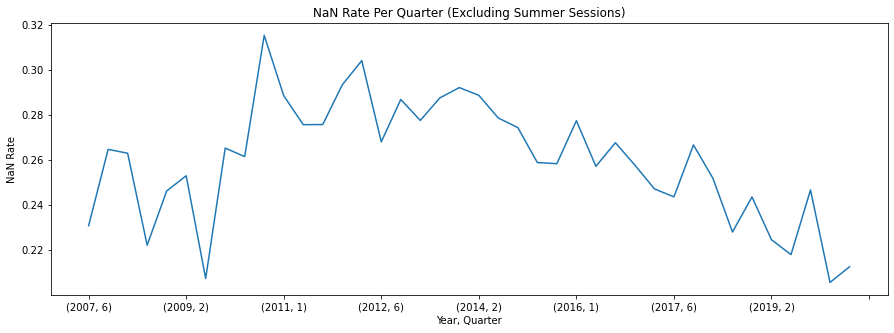

In [29]:
no_summer = capes[capes['Term_num'].isin([1,2,6])]
no_summer.set_index(['Year', 'Term_num']).isna().groupby(['Year', 'Term_num']).mean()['Avg Grade Received'].plot(figsize = (15, 5))
plt.ylabel("NaN Rate")
plt.title("NaN Rate Per Quarter (Excluding Summer Sessions)")
plt.xlabel("Year, Quarter")
plt.show()

We found that 29.66% of our pre-COVID observations have NaN values, while 21.31% of our post-COVID observations have NaN values. In general, there has been a trend downward over time.

We acknowledge that these omissions absolutely bias our grade data - professors that would choose not to provide average grade data most probably also have a tendency to grade higher or lower than the mean. This would be very problematic if we were trying to infer the population average grade or predict future average grades. However, since we are comparing means across a time axis, we believe this bas will be less impactful and are opting to drop these observations.

In [30]:
capes.dropna(inplace = True)

# Data Analysis & Results

## EDA

In [31]:
#Redo pre/post COVID partition, with NaN values dropped
#Here we define pre-covid as Winter quarter of 2020, and before
pre_covid = capes[capes['Year'] < 2020]
pre_covid = pre_covid.append(capes[(capes['Year'] == 2020) & (capes['Term_num'] <= 2)])

covid = capes[(capes['Year'] == 2020) & (capes['Term_num'] > 2)]

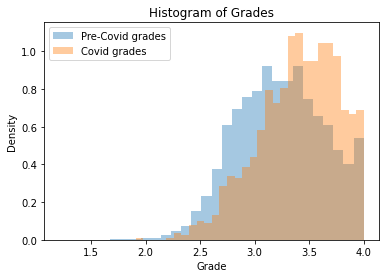

In [32]:
pre_covid_grades = pre_covid['Avg Grade Received']
covid_grades = covid['Avg Grade Received']

plt.hist(pre_covid_grades, alpha = 0.4, label = "Pre-Covid grades", density = True, bins = 30)
plt.hist(covid_grades, alpha = 0.4, label = "Covid grades", density = True, bins = 30)
plt.title("Histogram of Grades")
plt.xlabel("Grade")
plt.ylabel("Density")
plt.legend()

Here we see a surprising result: the central tendency of grades during covid is higher than pre-covid. One possibility that this could be explained by is that professors were more lenient and accommodating in general during covid, resulting in a higher average of grades. We should note that the dataset size for pre-covid and during covid is very different, 32170 vs 1372. However, this visualization shows a difference between the two distributions that should prompt further investigation.

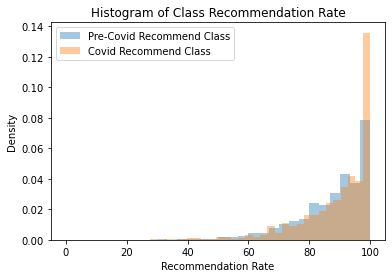

In [33]:
pre_covid_rcmnd_class = capes[capes['Year'] < 2020]['Rcmnd Class']
pre_covid_rcmnd_class = pre_covid_rcmnd_class.append(capes[(capes['Year'] == 2020) & (capes['Term_num'] <= 2)]['Rcmnd Class'])
covid_rcmnd_class = capes[(capes['Year'] == 2020) & (capes['Term_num'] > 2)]['Rcmnd Class']
plt.hist(pre_covid_rcmnd_class, alpha = 0.4, label = "Pre-Covid Recommend Class", density = True, bins = 30)
plt.hist(covid_rcmnd_class, alpha = 0.4, label = "Covid Recommend Class", density = True, bins = 30)
plt.title("Histogram of Class Recommendation Rate")
plt.xlabel("Recommendation Rate")
plt.ylabel("Density")
plt.legend()

From the histogram, we can see that the courses which have their recommended rate of 100 percent or close to 100 percent are highly increased. In which case, the median shifts from 90.5 to 93.0, and the mean shifts from 87.52 to 89.42. We can conclude that the appraisal for courses are increased during the covid, compared to the pre-covid periods. The reason that causes the rate to change might be the decrease of the difficulty of the courses due to the covid. However, noticing that the samples after the covid is less than the samples before, the covid-time result owns more highly by chance possibility and may be caused by students becoming harder to get access to the internet to rate.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:385: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(


Text(0, 0.5, 'Grade')

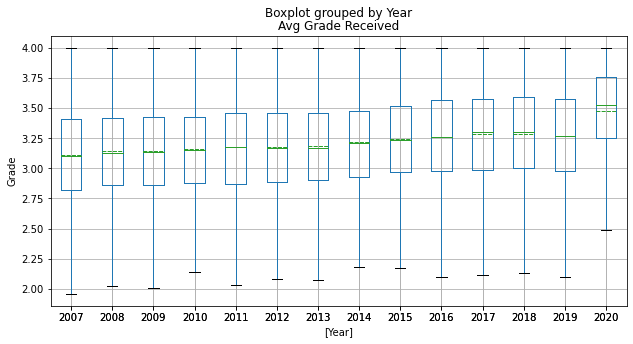

In [34]:
#boxplot of average grade received from 2007-2020
#need to neatly format
scores=capes[['Avg Grade Received','Year']]
ax = scores.boxplot(by='Year', meanline=True, showmeans=True, showcaps=True, 
                showbox=True, showfliers=False, return_type='axes', figsize = (10, 5))
a2 = capes[['Avg Grade Received','Year']]
a2.boxplot(by='Year', meanline=True, showmeans=True, showcaps=True, 
           showbox=True, showfliers=False, ax=ax)
plt.ylabel("Grade")

From this boxplot of student’s average grades received from 2007 to 2020, we can see that there was a steady, slight increase from 2007 to 2019 in gpa but we see a dramatic increase in 2020. Not only are the medians and means of grades are higher by about 0.25 gpa from 2019 to 2020, there are less students receiving grades below 2.50 gpa compared to previous years. The interquartile range and minimum outliers shifted up in 2020 and shows that students are getting better grades during covid.

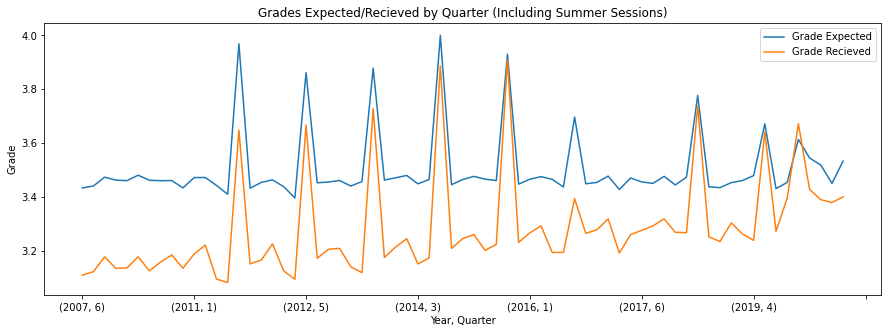

In [35]:
capes.groupby(['Year', 'Term_num']).mean()['Avg Grade Expected'].plot(figsize = (15, 5), label = "Grade Expected")
capes.groupby(['Year', 'Term_num']).mean()['Avg Grade Received'].plot(figsize = (15, 5), label = "Grade Recieved")
plt.xlabel("Year, Quarter")
plt.ylabel("Grade")
plt.title("Grades Expected/Recieved by Quarter (Including Summer Sessions)")
plt.legend()

This graph plots the average grades received and expected each quarter. We should note that the x-axis does not linearlly represent time, as quarters do not have equally spaced start dates.

We can observe an interesting periodicity here: approximately every year, there is a spike in both grade expected and recieved. If we investigate a bit further, as seen below, we find that all of these outliers are from term 5 (Special Summer Session) except for one in Spring 2020.

In [36]:
#Outliers in Avg. Grade Received
test = capes.groupby(['Year', 'Term_num']).mean()['Avg Grade Received']
test[test > 3.5]

Year  Term_num
2011  5           3.648333
2012  5           3.666667
2013  5           3.728000
2014  5           3.886667
2015  5           3.910000
2018  5           3.738333
2019  5           3.641250
2020  2           3.671912
Name: Avg Grade Received, dtype: float64

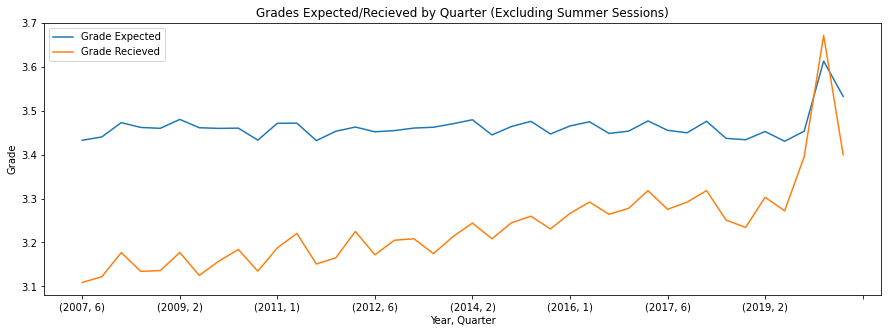

In [37]:
no_summer = capes[capes['Term_num'].isin([1,2,6])]
no_summer.groupby(['Year', 'Term_num']).mean()['Avg Grade Expected'].plot(figsize = (15, 5), label = "Grade Expected")
no_summer.groupby(['Year', 'Term_num']).mean()['Avg Grade Received'].plot(figsize = (15, 5), label = "Grade Recieved")
plt.xlabel("Year, Quarter")
plt.ylabel("Grade")
plt.title("Grades Expected/Recieved by Quarter (Excluding Summer Sessions)")
plt.legend()

If we filter out Summer Sessions, we see grades hold much more steadily over time, with fewer outliers. However, some outliers still remain in 2020, which we will zoom into and analyze further below.

In [38]:
#creation of line chart

terms = ["FA18", "WI19", "SP19", "FA19", "WI20", "SP20", "FA20"]
grade_expected = []
grade_received = []

#function to calculate average grades expected and average grades received

def average_expected():
    for term in terms:
        df = capes[capes['Term'] == term]
        average_e = sum(df['Avg Grade Expected'])/len(df)
        grade_expected.append(average_e)
        
        average_r = sum(df['Avg Grade Received'])/len(df)
        grade_received.append(average_r)

average_expected()
            
#creation of dataframe with results

data = {'grade_expected': grade_expected,
        'grade_received': grade_received,
       'Term': ["FA18", "WI19", "SP19", "FA19", "WI20", "SP20", "FA20"]}


average_grades = pd.DataFrame(data, columns = ['grade_expected','grade_received','Term'])
            
average_grades = average_grades.set_index('Term')

average_grades


,grade_expected,grade_received
Term,,
FA18,3.437163,3.250999
WI19,3.434051,3.234226
SP19,3.452793,3.303001
FA19,3.430582,3.272026
WI20,3.453440,3.394990
SP20,3.613237,3.671912
FA20,3.532935,3.399794


Text(0, 0.5, 'Grade')

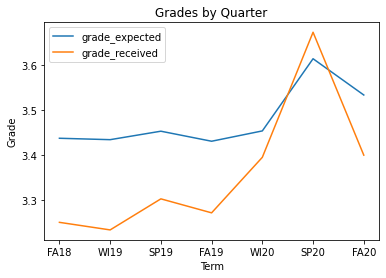

In [39]:
average_grades.plot.line(title = 'Grades by Quarter')
plt.ylabel("Grade")

This zoomed in view of the above two graphs depicts grades expected and grades recieved over time from Fall 2018 to Fall 2020. The COVID epidemic began to affect college students in Winter 2020 when students living on campus were encouraged to move out before spring break in March. This led to all finals being held remotely in Winter 2020. In this graph we can see the spike in grades in Winter 2020, possibly due to this change. Since Fall 2019, the average grades expected and recieved have remained above the previous year, possibly due to increased leniency, open-book tests, and the effect of quarantine on students' free time. Another thing to notice is that the average grade received in Fall 2020 decreased from Spring 2020, for the first time since the pandemic started. This could possibly indicate that professors are reducing leniency, or are getting used to the online format of classes.

## Inference: t-tests

### Grades

We would like to perform a formal hypothesis test to determine if there is a statistically significant difference between grades pre and post COVID. We plan on employing a t-test to do so, with the following null and alternative hypotheses:

$H_0 : \bar{x}_{pre-COVID} = \bar{y}_{post-COVID}$

$H_a : \bar{x}_{pre-COVID} \neq \bar{y}_{post-COVID}$

Before we perform our t-test, let's verify the following t-test assumptions:

- Data are continuous
- Normally distributed
- Large enough sample size
- Equal variance between groups

#### Data are continuous - Satisfied

Our GPA data is a column of numerical values ranging from 0.00 to 4.00. It has been rounded down to two decimal places, but it is continuous.

#### Normally distributed - Satisfied
We performed Shapiro-Wilk tests of normality on both pre and post COVID grades. For both samples, we found a p-value $ < 0.001$, indicating that our data is normally distributed.

In [40]:
#Shapiro-Wilk tests for normality

print("Pre-COVID:")
print(stats.shapiro(pre_covid_grades))
print("\nPost-COVID:")
print(stats.shapiro(covid_grades))

Pre-COVID:
ShapiroResult(statistic=0.9890048503875732, pvalue=1.6114932339735396e-43)

Post-COVID:
ShapiroResult(statistic=0.9721975922584534, pvalue=4.554546119095371e-17)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [54]:
stats.kstest(covid_grades, 'norm', N = 1)

KstestResult(statistic=0.988584231318827, pvalue=0.0)

#### Large enough sample size -Satisfied
We have sample sizes of $n = 33560$ pre-COVID, and $n = 1606$ post-COVID, sufficient for our t-test.

In [41]:
len(pre_covid_grades)

33560

In [42]:
len(covid_grades)

1606

#### Equal variance between groups - Not Satisfied
We performed a one-way ANOVA test to compare the variance between our pre and post COVID groups. We found a p-value $< 0.001$ for observing the variances of the two groups from the same population, indicating that our samples do not have equal variances.

In [43]:
#One way ANOVA test for variance
stats.f_oneway(pre_covid_grades, covid_grades)

F_onewayResult(statistic=266.1131792124293, pvalue=1.322023554045015e-59)

#### t-test
Since we found that our two groups of data satisfied all assumptions except for equal variance, we will be using a Welch t-test, which unlike Student's t-test, accounts for unequal variance. From our Welch t-test, we found a p-value $< 0.001$ of finding these two means from different samples from a single population. This indicates that we should reject our null hypothesis in favor of our alternative.

In other words, there is a statistically significant difference between mean GPA pre and post COVID. 

In [44]:
#Welch t-test
stats.ttest_ind(pre_covid_grades, covid_grades, equal_var = False)

Ttest_indResult(statistic=-17.75058041605319, pvalue=4.469420164803651e-65)

### Class Recommendation Rates

We repeated the same tests for Class/Instructor Recommendation rates. Here is a summary of our test for our assumptions and our results for Class Recommendation Rates:

- Data are continuous - Satisfied

Data is continuous range from 0.0 to 100.0
- Normally distributed - Satisfied

Shapiro-Wilk tests with p-values $ < 0.001$
- Large enough sample size - Satisfied

$n = 33560$ pre-COVID, and $n = 1606$ post-COVID
- Equal variance between groups - Not Satisfied

ANOVA test with p-value $ < 0.001$ (indicating unequal variance)

Informed by these results, we again performed a Welsh t-test and found a p-value $ < 0.001$, indicating that we should reject our null hypothesis.

In [45]:
#Analysis for Class Recommendation Rates
pre_covid_rcmd_class = pre_covid['Rcmnd Class']
covid_rcmd_class = covid['Rcmnd Class']
print("CLASS RECOMMENDATION RATE")

#Shapiro-Wilk tests for normality
print("\nPre-COVID:")
print(stats.shapiro(pre_covid_rcmd_class))
print("\nPost-COVID:")
print(stats.shapiro(covid_rcmd_class))

#One way ANOVA test for variance
print("\nANOVA test:")
print(stats.f_oneway(pre_covid_rcmd_class, covid_rcmd_class))

#Welch t-test:
print("\nt-test:")
print(stats.ttest_ind(pre_covid_rcmd_class, covid_rcmd_class, equal_var = False))

CLASS RECOMMENDATION RATE

Pre-COVID:
ShapiroResult(statistic=0.8690725564956665, pvalue=0.0)

Post-COVID:
ShapiroResult(statistic=0.8211362957954407, pvalue=5.193060768553625e-39)

ANOVA test:
F_onewayResult(statistic=40.11866270289128, pvalue=2.4187959605043754e-10)

t-test:
Ttest_indResult(statistic=-6.461941678053005, pvalue=1.332727411702565e-10)


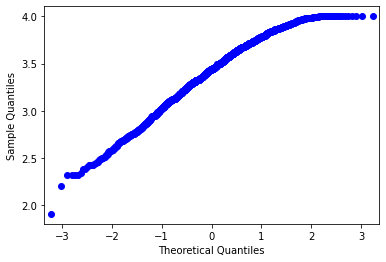

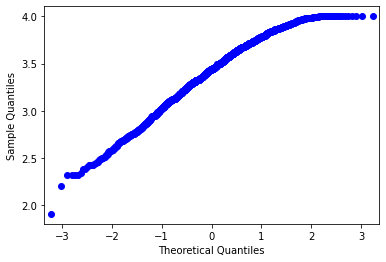

In [47]:
import statsmodels.api as sm
sm.qqplot(covid_grades)

# Ethics & Privacy

We acknowledge that there may be potential biases and unintended use of our data and results. And to the best of our abilities, considered all possible privacy and ethical concerns to address.  
For our question, we focused on the University of California, San Diego student population and only used UCSD’s CAPEs website as the dataset. So, there is no significant bias in our chosen dataset because it is mostly representative and in scope of our question’s population. The data itself and analyses though may contain bias as some are dependent on student’s subjective evaluations. As well, not all students are required to evaluate their courses so we are missing a set of data that could otherwise make a difference to the results. Our question, data, and analyses then can not be generalizable to other populations since our findings are unique to UCSD and its students.
Since we are observing a school, informed consent of individuals does not apply. But, the source from the school is only accessible by UCSD-affiliated individuals. So, we made sure the collection of CAPE scores are anonymous and contain no private information of their students. But, this may be a breach of privacy by outsiders who may misuse this information for their own benefit which may not be ethical. 
In cleaning data, we did drop some rows with null values for average grade data but we investigated these further to make sure there is no significant bias. And in our analyses, we noted that the dataset size shrunk from pre-covid to during covid which could affect our determination of results and prompts for further investigation.
There are assumptions about the increase in grades during the pandemic at UCSD, but we do not know the exact reasons or causes from our observations. However, this is interesting for further investigation and discussion!

# Conclusion & Discussion

Our goal for this project was to determine how remote learning during the COVID-19 pandemic has affected students’ grades and learning experiences at the University of California San Diego. We hypothesized that remote learning would have a negative effect overall due to factors such as the abrupt transition, the change in environment, and cases of disparate internet access. Using data from the UCSD CAPE website (Course and Professor Evaluations), we were able to see differences in how students filled out their CAPEs surveys before and during the pandemic. We measured the effect on students’ grades with CAPEs data for average grades received and expected, and learning experience based on the course recommendation rate given by students.

After cleaning and analyzing the data, we found a general upwards trend in all three categories. To verify the conclusions we drew from the visualizations, we performed Welsh t-tests on the average grades received and the course recommendation rates pre- versus during COVID. For both tests, a p-value < 0.001 was found, indicating we reject the null hypothesis: that there is no statistically significant difference between pre- and during COVID GPA and recommendation rates. 
 
This indicates that despites the drawbacks from the effects of a
global pandemic and quarantine, students' grades and rankings of courses have
overall improved. This is a surprising result because of the drawbacks of
online learning we outlined in our background. We can only speculate on the cause for the shift, and it may be due to some of the adjustments professors and classes have made due to online learning. For example, many students may do better with classes that instated open-book tests, or with the flexibility that comes with recorded lectures. It is also interesting to note that in the line chart visualizations, the upward spike appears to be falling despite UCSD still relying on online learning. This could indicate professors that are being less lenient as the pandemic continues, and grades may approach the level they were pre-pandemic again.

However, there are several limitations to our analysis. For one, different classes are offered different quarters, and professors often rotate. This makes it difficult to directly compare grades pre- and during the pandemic since there is variation due to these outside factors. Our dataset is also limited by CAPEs surveys being voluntary, leading to inconsistent response rates. Students may choose to only leave CAPEs if they have strongly negative or positive experiences for example, possibly causing
the data to not be representative of the whole student population. Our dataset is also limited by the amount of NaN values in the dataset, over 20%. This could introduce bias into our data since professors may elect to not provide certain data if it is much above or below the mean. Lastly, our largest limitation is the implementation of the Pass/No Pass grade option during the pandemic. Many major departments opt to let students take major classes for Pass/No Pass, and the deadline has been extended to the last week of instruction, Week 10, to change the grading option. This clearly introduces bias in our data because students struggling in classes can easily choose to take a class Pass/No Pass, and their grade thus does not affect the averages reported on CAPEs.

Since both the visualizations and statistics tests show that grades and course recommendations on CAPEs have increased, it appears that the pandemic did not negatively affect students’ GPA and learning experience, and instead positively affected both. However, when considering the limitations, we cannot fully conclude this without unbiased data and a more complete dataset not affected by implementation of Pass/No Pass. Therefore we conclude that with the data available, there is a statistically significant increase in students’ grades and recommendation rates on CAPEs, but it may not represent the UCSD student population as a whole.

# Team Contributions

Kelly wrote the overview, ethics and privacy section, created the box plot in the EDA section, and edited the presentation video. Lily handled the scraping and cleaning of data, and wrote the code/annotations for the inferential analysis section. Sophia wrote the conclusion and discussion section, and created the quarterly line plot in the EDA section. Yining wrote the background section, and created histograms for the EDA section. Furthermore, every group member contributed to the presentation video by recording a section.